<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248758 entries, 0 to 248757
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Frequency (Monobit) Test                    248758 non-null  float64
 1   Block Frequency Test                        248758 non-null  float64
 2   Run Test                                    248758 non-null  float64
 3   Longest Run of Ones in a Block Test         248758 non-null  float64
 4   Binary Matrix Rank Test                     248758 non-null  float64
 5   Discrete Fourier Transform (Spectral) Test  248758 non-null  float64
 6   Non-Overlapping Template Matching Test      248758 non-null  float64
 7   Overlapping Template Matching Test          248758 non-null  float64
 8   Universal Statistical Test                  248758 non-null  float64
 9   Linear Complexity Test                      248758 non-null  float64
 

c:\Users\Hardik\envs\final\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-mlogloss:1.75797	test-mlogloss:1.75689
[1]	train-mlogloss:1.63999	test-mlogloss:1.63843
[2]	train-mlogloss:1.55144	test-mlogloss:1.54962
[3]	train-mlogloss:1.48074	test-mlogloss:1.47908
[4]	train-mlogloss:1.42177	test-mlogloss:1.42024
[5]	train-mlogloss:1.37597	test-mlogloss:1.37446
[6]	train-mlogloss:1.33559	test-mlogloss:1.33361
[7]	train-mlogloss:1.29856	test-mlogloss:1.29665
[8]	train-mlogloss:1.26931	test-mlogloss:1.26735
[9]	train-mlogloss:1.24211	test-mlogloss:1.24032
[10]	train-mlogloss:1.21681	test-mlogloss:1.21521
[11]	train-mlogloss:1.19602	test-mlogloss:1.19443
[12]	train-mlogloss:1.17230	test-mlogloss:1.17072
[13]	train-mlogloss:1.15016	test-mlogloss:1.14852
[14]	train-mlogloss:1.13193	test-mlogloss:1.13064
[15]	train-mlogloss:1.11318	test-mlogloss:1.11175
[16]	train-mlogloss:1.09672	test-mlogloss:1.09514
[17]	train-mlogloss:1.08123	test-mlogloss:1.07978
[18]	train-mlogloss:1.06606	test-mlogloss:1.06496
[19]	train-mlogloss:1.05129	test-mlogloss:1.05020
[20]	train

c:\Users\Hardik\envs\final\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:00:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4429
           1       1.00      0.99      1.00      6647
           2       0.97      0.99      0.98      6118
           3       0.96      0.97      0.96      8518
           4       0.97      0.96      0.96     10745
           5       0.98      0.98      0.98     12705
           6       1.00      0.94      0.97       590

    accuracy                           0.98     49752
   macro avg       0.98      0.98      0.98     49752
weighted avg       0.98      0.98      0.98     49752

Confusion Matrix:
 [[ 4428     1     0     0     0     0     0]
 [    2  6613    27     5     0     0     0]
 [    0    12  6040    61     5     0     0]
 [    0     1    64  8223   222     8     0]
 [    0     0    66   174 10357   148     0]
 [    0     0    12    76   141 12476     0]
 [    0     0     0     0     0    36   554]]


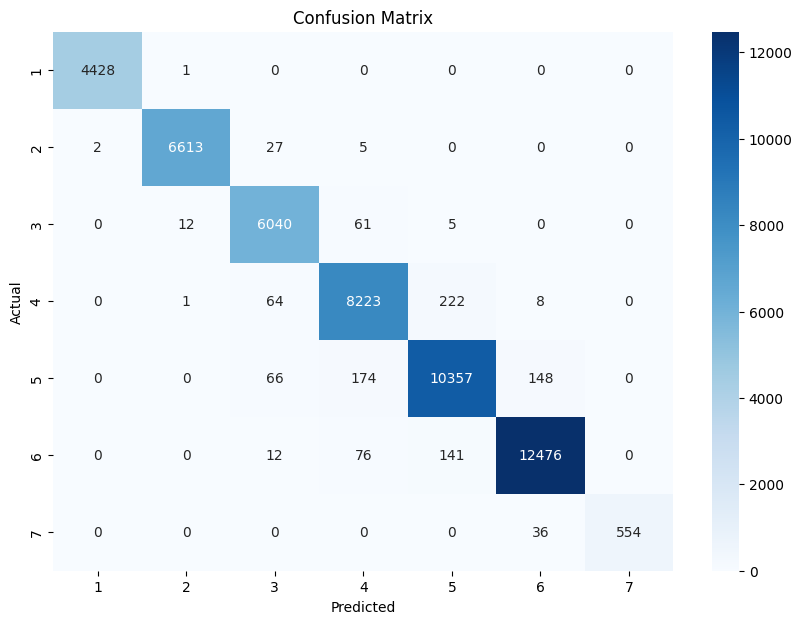

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing p-values
df = pd.read_csv('final.csv')

# Replace with the actual file path
df.drop('Image Name',axis=1,inplace=True)

df.info()



X = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(int) - 1 



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


dtrain = xgb.DMatrix(X_train,y_train,enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

params = {
    'max_depth':2,
    'eta':0.3,
    'objective':'multi:softprob',
    'num_class':7,
    'eval_metric': 'mlogloss'
}


epoch=500
eval_res={}
evals = [(dtrain, 'train'), (dtest, 'test')]
model = xgb.train(params,dtrain,epoch,evals,evals_result=eval_res)

# Make predictions using the trained model
y_pred_probs = model.predict(dtest)  # Get probabilities for each class

# Convert probabilities to class labels
y_pred = y_pred_probs.argmax(axis=1)  # Get class labels by taking argmax

# Save the model
model.save_model('xgboost_model.model')

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Now y_pred is the predicted class labels
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5, 6, 7], yticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


